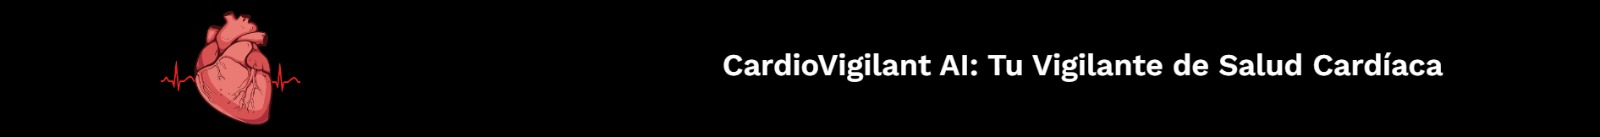

#ExpoTecnológica - Hackaton Grupo 12

*   Karen Agudelo García
*   Gleydis Correal de los Rios
*   Roberto Echeverry Ríos
*   Jose Alexander Ríos
*   Andrés Orozco Duque







# Entendimiento y preparación de datos



In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [ ]:
! git clone https://github.com/Orozco-Duque/hackaton

Cloning into 'hackaton'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 2.80 MiB | 6.29 MiB/s, done.


In [ ]:
datos = pd.read_csv("/content/hackaton/heart.csv", sep=";", thousands=r",", decimal=r".",  skip_blank_lines=True)
datos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Análisis exploratorio

#Ajuste de datos

Se cargan las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

Se separan las variables de entrada y la salida:

In [ ]:
X = datos.drop(["target"],axis=1)
y = datos['target']

Se construyen funciones para graficar la matrix de confusión

In [ ]:
def confusionMatrix (data,labels,classifier):
  plt.rcParams["figure.figsize"] = (6.4,4.8)
  titles_options = [
      ("Confusion matrix, without normalization", None),
      ("Normalized confusion matrix", "true"),
  ]
  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_estimator(
          classifier,
          data,
          labels,
          cmap=plt.cm.Blues,
          normalize=normalize,
      )
      disp.ax_.set_title(title)

      #print(title)
      #print(disp.confusion_matrix)

  plt.show()

Se construye una función para visualizar los resultados de la validación cruzada

In [ ]:
def results_crossValidation (cv_data):
  results_df = pd.DataFrame(cv_data)
  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(
      results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
  ).rename_axis("kernel")
  return(results_df)

Se separan los conjuntos de entrenamiento y test y se escalan las variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

Se implementa un modelo de regresión logística sin validación cruzada

#Modelo de clasificacion: Regresión logística

In [ ]:
logreg = LogisticRegression(C=1e1, solver='lbfgs',max_iter=10000)  #se crea el modelo C tiene que ver con la tasa de aprendizaje
logreg.fit(X_train_scaled, y_train) # se entrena el modelo
y_pred=logreg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       100
           1       0.84      0.83      0.83       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



Se repite el modelo pero con ajuste de hiperparametros y validación cruzada

In [ ]:
params = {
    'C':np.logspace(-3,5,9),
    'max_iter': [500, 1000, 10000],}
search = GridSearchCV(logreg, params, cv=3)
search.fit(X_train_scaled, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.855):
{'C': 100.0, 'max_iter': 500}


In [ ]:
results=results_crossValidation(search.cv_results_)
results[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
100000.0_10000,"{'C': 100000.0, 'max_iter': 10000}",1,0.854843,0.020555
100000.0_500,"{'C': 100000.0, 'max_iter': 500}",1,0.854843,0.020555
10000.0_10000,"{'C': 10000.0, 'max_iter': 10000}",1,0.854843,0.020555
10000.0_1000,"{'C': 10000.0, 'max_iter': 1000}",1,0.854843,0.020555
10000.0_500,"{'C': 10000.0, 'max_iter': 500}",1,0.854843,0.020555
1000.0_10000,"{'C': 1000.0, 'max_iter': 10000}",1,0.854843,0.020555
1000.0_1000,"{'C': 1000.0, 'max_iter': 1000}",1,0.854843,0.020555
1000.0_500,"{'C': 1000.0, 'max_iter': 500}",1,0.854843,0.020555
100.0_10000,"{'C': 100.0, 'max_iter': 10000}",1,0.854843,0.020555


In [ ]:
y_pred=search.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       100
           1       0.84      0.83      0.83       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



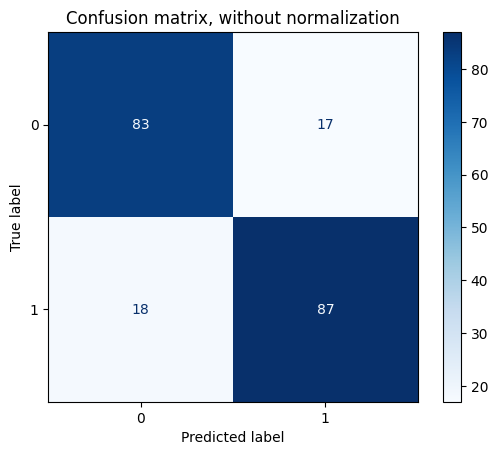

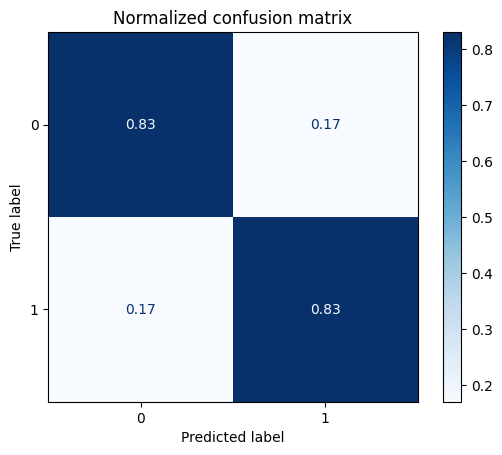

In [ ]:
confusionMatrix(X_test_scaled,y_test,search)

A continuación se implementa un modelo con selección de características

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
logreg = LogisticRegression(C=100, solver='lbfgs',max_iter=500)

In [ ]:
sfs1 = SFS(logreg,
           k_features=13,
           forward=True,
           floating=False,
           #verbose=2,
           scoring='f1',
           cv=5)

sfs1 = sfs1.fit(X_train_scaled,y_train)

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

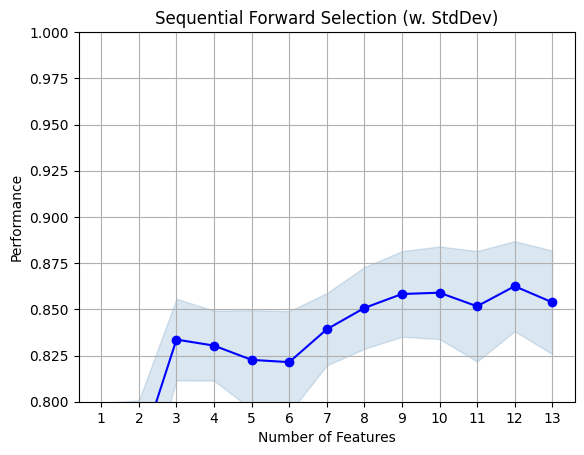

In [ ]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
sfs1.k_feature_idx_

(1, 2, 5, 6, 8, 9, 10, 11)

In [ ]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

#Modelo de clasificación:

In [ ]:
#Random Forest

# Crea el modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo en el conjunto de entrenamiento
random_forest_model.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test_scaled)

# Evalúa el modelo
accuracy1 = accuracy_score(y_test, y_pred)
f1_1 =f1_score(y_test, y_pred)
Precision_Score_1=precision_score(y_test, y_pred)
recall_score_1=recall_score(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred)

# Imprime las métricas de evaluación
print("Exactitud (Accuracy1):", accuracy1)
print("F1_1",f1_1)
print("Precision_Score_1",Precision_Score_1)
print("recall_score_1",recall_score_1)
print("\nMatriz de Confusión:\n", conf_matrix1)
print("\nInforme de Clasificación:\n", class_report1)

Exactitud (Accuracy1): 0.9658536585365853
F1_1 0.9668246445497629
Precision_Score_1 0.9622641509433962
recall_score_1 0.9714285714285714

Matriz de Confusión:
 [[ 96   4]
 [  3 102]]

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.96      0.97      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
params = {
    'n_estimators':np.arange(50,200,50),}
search = GridSearchCV(random_forest_model, params, cv=5)
search.fit(X_train_scaled, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.984):
{'n_estimators': 50}


In [ ]:
y_pred=search.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.96      0.97      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



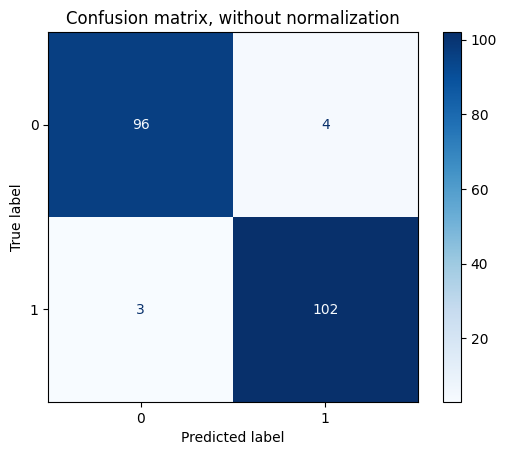

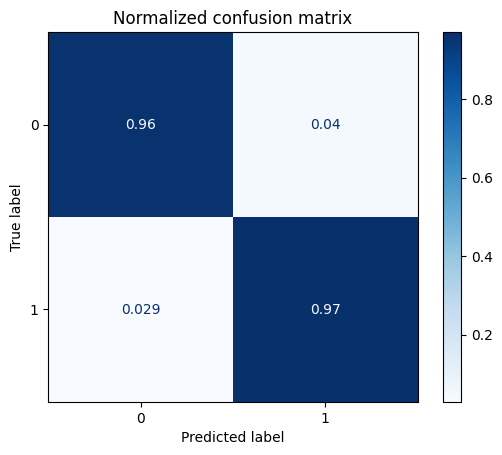

In [ ]:
confusionMatrix(X_test_scaled,y_test,search)